# Parti 1 - Data

***le dataset Cifar-10 sont des image 32*32 de 10 objet differents:
  ***--Avion, voitur, oiseau, chat, cerf, chien, grenouille, cheval, bateau, camion
  -- ce sont des images en couleur***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

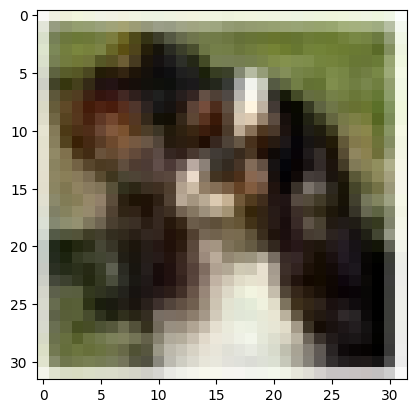

In [7]:
plt.imshow(x_train[500])